In [2]:
# Load the dataset from the data folder
setwd("../data")
iris.data <- read.csv("iris.data.txt", header = TRUE)

In [4]:
# Rename variables for simplicity
names(iris.data)[names(iris.data) == "sepalenght"] <- "sl"
names(iris.data)[names(iris.data) == "petalenght"] <- "pl"
names(iris.data)[names(iris.data) == "sepalwidth"] <- "sw"
names(iris.data)[names(iris.data) == "petalwidth"] <- "pw"

In [6]:
# Convert 'class' to numeric factor
iris.data$class = as.factor(iris.data$class)
iris.data$class = as.numeric(iris.data$class)

In [8]:
# Fit first linear model
m1 = lm(class ~ ., data = iris.data)
summary(m1)


Call:
lm(formula = class ~ ., data = iris.data)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.59046 -0.15230  0.01338  0.10332  0.55061 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.19208    0.20470   5.824 3.57e-08 ***
sl          -0.10974    0.05776  -1.900 0.059418 .  
sw          -0.04424    0.05996  -0.738 0.461832    
pl           0.22700    0.05699   3.983 0.000107 ***
pw           0.60989    0.09447   6.456 1.52e-09 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2191 on 145 degrees of freedom
Multiple R-squared:  0.9304,	Adjusted R-squared:  0.9285 
F-statistic: 484.8 on 4 and 145 DF,  p-value: < 2.2e-16


In [10]:
shapiro.test(residuals(m1))
# R2 = 0.9285, p-value = 0.4589


	Shapiro-Wilk normality test

data:  residuals(m1)
W = 0.991, p-value = 0.4589


In [12]:
# Add interaction terms to improve R2
m2 = lm(class ~ . + sl*sw + pl*pw, data = iris.data)
summary(m2)


Call:
lm(formula = class ~ . + sl * sw + pl * pw, data = iris.data)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.55036 -0.11915 -0.00777  0.11794  0.56971 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.54327    1.04585   1.476 0.142246    
sl          -0.10167    0.18033  -0.564 0.573786    
sw          -0.04040    0.34467  -0.117 0.906865    
pl           0.17910    0.05618   3.188 0.001758 ** 
pw           0.21188    0.13803   1.535 0.126989    
sl:sw       -0.01416    0.05855  -0.242 0.809199    
pl:pw        0.08617    0.02241   3.845 0.000181 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2099 on 143 degrees of freedom
Multiple R-squared:  0.937,	Adjusted R-squared:  0.9343 
F-statistic: 354.3 on 6 and 143 DF,  p-value: < 2.2e-16


In [14]:
shapiro.test(residuals(m2))


	Shapiro-Wilk normality test

data:  residuals(m2)
W = 0.98506, p-value = 0.105


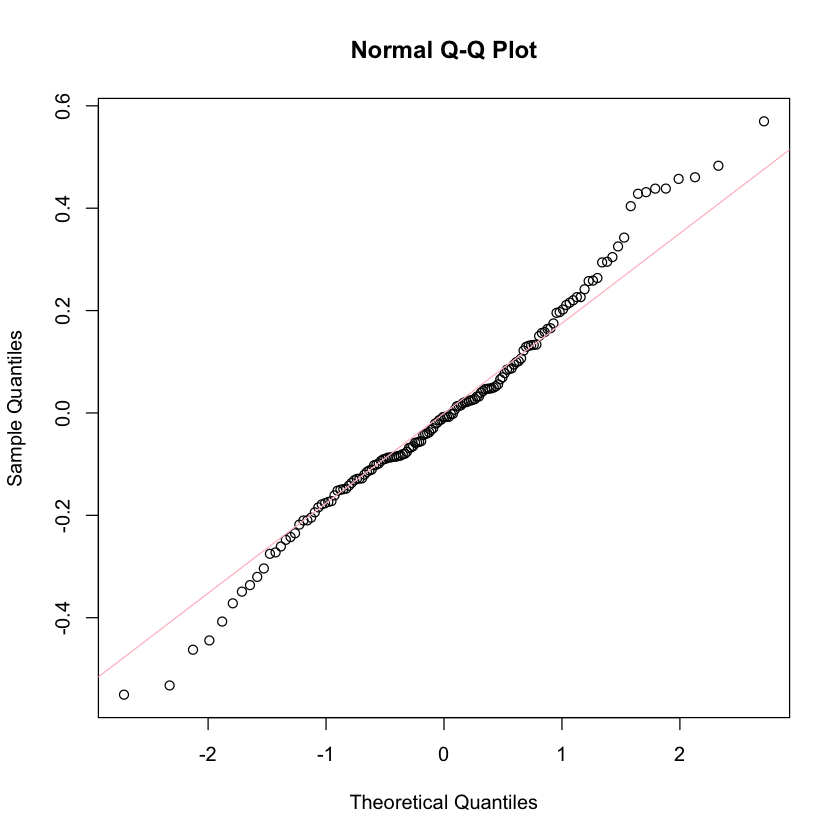

In [16]:
qqnorm(m2$residuals)
qqline(m2$residuals, col = 'pink') # Tails are quite distant
# R2 = 0.9343, p-value = 0.105

84           71          119           78           73          101 
-0.550360897 -0.532378968 -0.462559545 -0.444412537 -0.407504082 -0.371923013 
          85           69           67           57           79           86 
-0.349087942 -0.336329413 -0.320256105 -0.303818815 -0.275130258 -0.272407173 
          64           55           53          110           92           56 
-0.260839322 -0.247841300 -0.242382302 -0.235096810 -0.218185164 -0.210133922 
          87           77          145           62           52           42 
-0.209824564 -0.204564987 -0.194198459 -0.184499074 -0.178720003 -0.176270747 
          91           60           88           54           74           95 
-0.173841201 -0.172319731 -0.161038809 -0.151982568 -0.150139772 -0.148898949 
         106           44           24          137          118           90 
-0.147877119 -0.142105589 -0.136750926 -0.131700218 -0.128826758 -0.128323298 
         144          123            9          141           97           25 
-0.127875469 -0.120435226 -0.115308788 -0.112358213 -0.110682123 -0.102190405 
         136           59          100           51          105           45 
-0.100934623 -0.098665453 -0.093682072 -0.090508180 -0.089566253 -0.087312710 
         115           76           39            4           89           27 
-0.087179821 -0.086156185 -0.085403257 -0.085284360 -0.083872167 -0.083275375 
          46           30           31           98            7           43 
-0.080625865 -0.079664189 -0.075803163 -0.068423685 -0.067238135 -0.064860026 
          66           26          133           48           12           96 
-0.058210974 -0.057809494 -0.056453835 -0.055095553 -0.043288659 -0.041188362 
          75          121            2           14            3           93 
-0.039875125 -0.037715718 -0.032957581 -0.029884173 -0.020762443 -0.019288180 
          13           22           72           10           35           38 
-0.014121134 -0.013146278 -0.008038542 -0.007497593 -0.007497593 -0.007497593 
          32          149            8          129            6           50 
-0.001988113 -0.001777041  0.006310198  0.012991256  0.013737114  0.014822670 
          18           83           40           70           41           81 
 0.018937301  0.021217600  0.021292669  0.024088701  0.024308839  0.025940838 
          21          103           20          116           36           47 
 0.026972251  0.032090995  0.032230901  0.039709421  0.042969056  0.046711083 
          61           28            5           65            1           29 
 0.047141842  0.047679861  0.048187002  0.049721372  0.052189667  0.055909055 
          23           63           68           19           49          125 
 0.065659676  0.069574020  0.077753374  0.084533748  0.085896687  0.087028831 
         146           17           11           82          131          108 
 0.094478697  0.099166628  0.101304072  0.106402529  0.121791097  0.128948085 
          58           37          113           94           33          109 
 0.131117065  0.132320018  0.132870500  0.133561710  0.150222281  0.156293335 
         114           16          132          142           34          140 
 0.158039620  0.164088412  0.165554815  0.174853381  0.195493548  0.197105802 
          99           80          122          104          102          143 
 0.202055559  0.210816066  0.215390795  0.220156627  0.226247796  0.226247796 
         112          126           15          148          138          117 
 0.241627115  0.257651117  0.258599008  0.263641355  0.294061284  0.295372824 
         147          111          150          107          124          135 
 0.304560686  0.325278472  0.342563796  0.404001349  0.428182488  0.431350039 
         128          130          139          127          120          134 
 0.438238873  0.438356498  0.457244575  0.460434207  0.482922833  0.569711288

84          76 
-0.55036090 -0.08615619

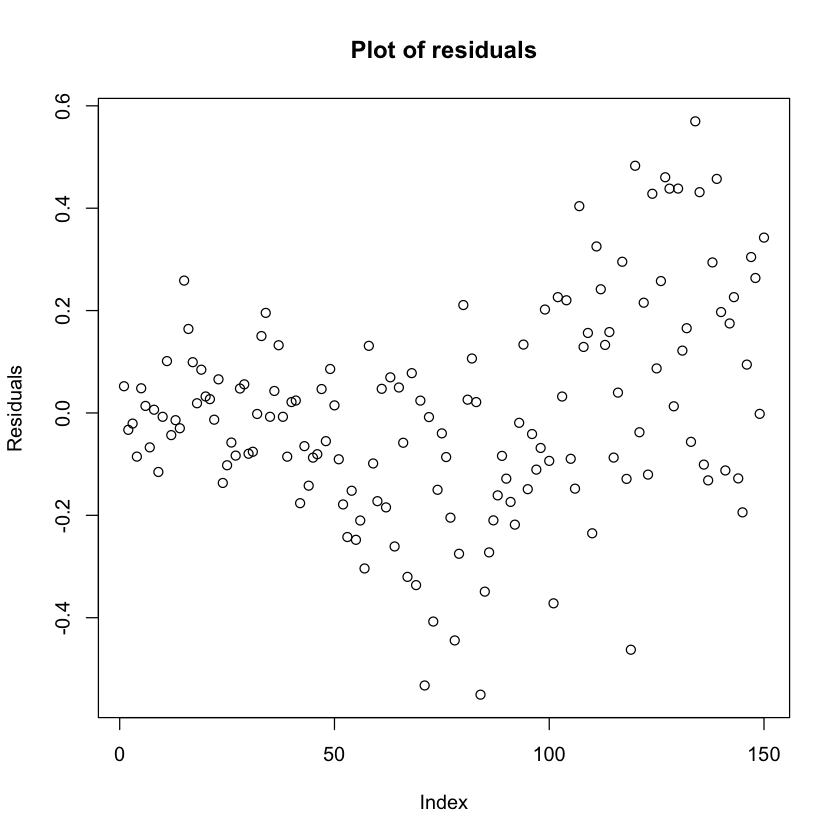

In [18]:
# Analyze influential points in m2

# Plot residuals
plot(m2$res, ylab = "Residuals", main = "Plot of residuals")
sort(m2$res)
sort(m2$res)[c(1, 50)]  # Check the first and last residual

In [20]:
# 1. Leverage points (R2 = 0.9464, p-value = 7.6e-05)
r = m2$rank
p = 4
n = dim(iris.data)[1]
lev = hatvalues(m2)
watchout_points_lev = lev[which(lev > 2 * r / n)]
watchout_ids_lev = seq_along(lev)[which(lev > 2 * r / n)]

# Fit model without leverage points
id_to_keep = !(1:n %in% watchout_ids_lev)
m3 = lm(class ~ . + sl*pl + sl*sw + sl*pw + pl*sw + pl*pw + sw*pw, iris.data[id_to_keep, ])
summary(m3)
shapiro.test(residuals(m3))


Call:
lm(formula = class ~ . + sl * pl + sl * sw + sl * pw + pl * sw + 
    pl * pw + sw * pw, data = iris.data[id_to_keep, ])

Residuals:
     Min       1Q   Median       3Q      Max 
-0.59122 -0.09450  0.00592  0.06546  0.58213 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept)  5.78579    2.09196   2.766  0.00651 **
sl          -1.03868    0.45991  -2.258  0.02558 * 
sw          -1.38772    0.62276  -2.228  0.02758 * 
pl          -0.04118    0.52246  -0.079  0.93730   
pw           1.81691    1.14235   1.591  0.11415   
sl:pl        0.04358    0.05143   0.847  0.39841   
sl:sw        0.29290    0.13093   2.237  0.02698 * 
sl:pw       -0.10722    0.14163  -0.757  0.45037   
sw:pl       -0.03591    0.12999  -0.276  0.78281   
pl:pw        0.14288    0.04510   3.168  0.00191 **
sw:pw       -0.37807    0.26821  -1.410  0.16106   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1909 on 130 degrees of freedom
Mul


	Shapiro-Wilk normality test

data:  residuals(m3)
W = 0.95735, p-value = 0.0002322


In [22]:
# 2. Cook's distance
Cdist = cooks.distance(m2)
watchout_ids_Cdist = which(Cdist > 4 / (n - p - 1))
watchout_Cdist = Cdist[watchout_ids_Cdist]

# Fit model without Cook's distance leverage points
id_to_keep = !(1:n %in% watchout_ids_Cdist)
m4 = lm(class ~ . + sl*pl + sl*sw + sl*pw + pl*sw + pl*pw + sw*pw, iris.data[id_to_keep, ])
summary(m4)
shapiro.test(residuals(m4))


Call:
lm(formula = class ~ . + sl * pl + sl * sw + sl * pw + pl * sw + 
    pl * pw + sw * pw, data = iris.data[id_to_keep, ])

Residuals:
     Min       1Q   Median       3Q      Max 
-0.55262 -0.09506  0.00340  0.06794  0.46329 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.852972   1.406696   2.028 0.044621 *  
sl          -0.323208   0.315323  -1.025 0.307292    
sw          -0.659186   0.415044  -1.588 0.114701    
pl          -0.218443   0.412644  -0.529 0.597463    
pw           1.988054   0.934703   2.127 0.035344 *  
sl:pl       -0.002298   0.042642  -0.054 0.957114    
sl:sw        0.110829   0.086700   1.278 0.203456    
sl:pw       -0.082269   0.122280  -0.673 0.502292    
sw:pl        0.082899   0.099617   0.832 0.406857    
pl:pw        0.164859   0.041143   4.007 0.000104 ***
sw:pw       -0.479223   0.222030  -2.158 0.032765 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1668 on 12


	Shapiro-Wilk normality test

data:  residuals(m4)
W = 0.95354, p-value = 0.0001245


In [24]:
# 3. Standardized residuals
res_std = m2$res / summary(m2)$sigma
watchout_ids_rstd = which(abs(res_std) > 2)

# Fit model without standardized residuals
id_to_keep = !(1:n %in% watchout_ids_rstd)
m5 = lm(class ~ . + sl*pl + sl*sw + sl*pw + pl*sw + pl*pw + sw*pw, iris.data[id_to_keep, ])
summary(m5)
shapiro.test(residuals(m5))


Call:
lm(formula = class ~ . + sl * pl + sl * sw + sl * pw + pl * sw + 
    pl * pw + sw * pw, data = iris.data[id_to_keep, ])

Residuals:
     Min       1Q   Median       3Q      Max 
-0.39294 -0.08345  0.00182  0.07012  0.39567 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  4.391816   1.019102   4.309 3.25e-05 ***
sl          -0.759441   0.245707  -3.091 0.002453 ** 
sw          -1.042821   0.307347  -3.393 0.000922 ***
pl           0.083382   0.342548   0.243 0.808076    
pw           1.490784   0.771482   1.932 0.055541 .  
sl:pl       -0.002264   0.035459  -0.064 0.949190    
sl:sw        0.219537   0.067909   3.233 0.001562 ** 
sl:pw       -0.021470   0.101955  -0.211 0.833555    
sw:pl        0.014228   0.086222   0.165 0.869197    
pl:pw        0.137373   0.033514   4.099 7.35e-05 ***
sw:pw       -0.432271   0.187680  -2.303 0.022891 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1458 on 12


	Shapiro-Wilk normality test

data:  residuals(m5)
W = 0.98322, p-value = 0.08855


In [26]:
# 4. Studentized residuals
stud = rstandard(m2)
watchout_ids_stud = which(abs(stud) > 2)

# Fit model without studentized residuals
id_to_keep = !(1:n %in% watchout_ids_stud)
m6 = lm(class ~ . + sl*pl + sl*sw + sl*pw + pl*sw + pl*pw + sw*pw, iris.data[id_to_keep, ])
summary(m6)
shapiro.test(residuals(m6))


Call:
lm(formula = class ~ . + sl * pl + sl * sw + sl * pw + pl * sw + 
    pl * pw + sw * pw, data = iris.data[id_to_keep, ])

Residuals:
     Min       1Q   Median       3Q      Max 
-0.39264 -0.09239  0.00044  0.06016  0.39272 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  4.006079   1.047968   3.823 0.000206 ***
sl          -0.673684   0.251475  -2.679 0.008372 ** 
sw          -0.943567   0.313339  -3.011 0.003144 ** 
pl           0.116073   0.341727   0.340 0.734674    
pw           1.310238   0.777780   1.685 0.094544 .  
sl:pl       -0.008993   0.035595  -0.253 0.800949    
sl:sw        0.197016   0.069321   2.842 0.005230 ** 
sl:pw       -0.002555   0.102309  -0.025 0.980117    
sw:pl        0.015924   0.085840   0.186 0.853133    
pl:pw        0.135030   0.033401   4.043 9.14e-05 ***
sw:pw       -0.408853   0.187512  -2.180 0.031085 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1451 on 12


	Shapiro-Wilk normality test

data:  residuals(m6)
W = 0.97936, p-value = 0.03578


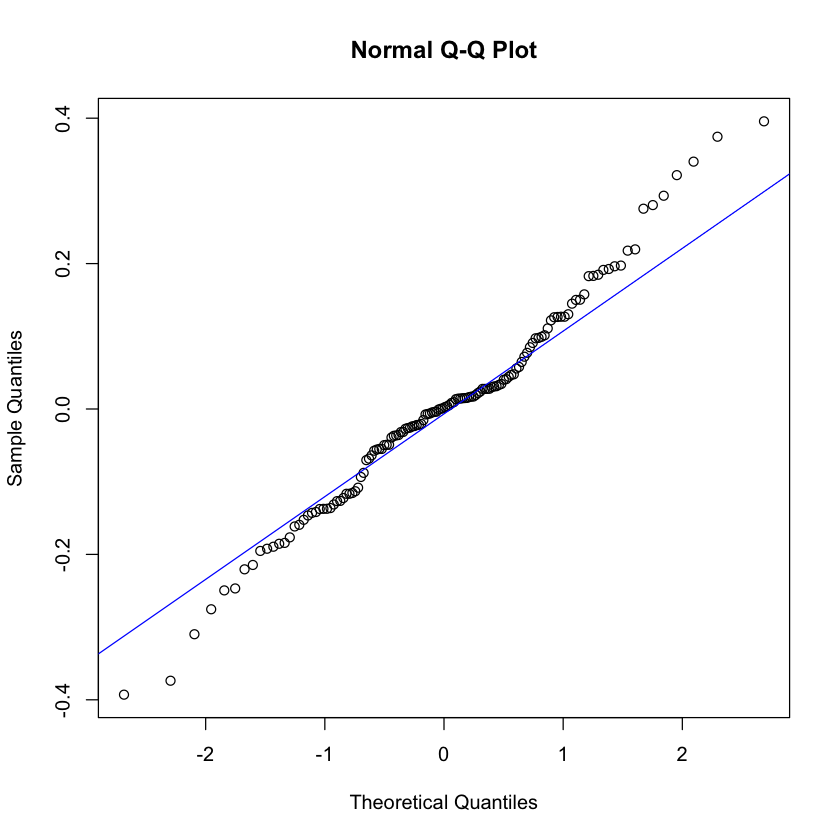

In [28]:
# Model comparison
# Chosen model: m5 with standardized residuals (R2 = 0.9678, p-value = 0.08855)

qqnorm(m5$residuals)
qqline(m5$residuals, col = 'blue') # Tails are less distant

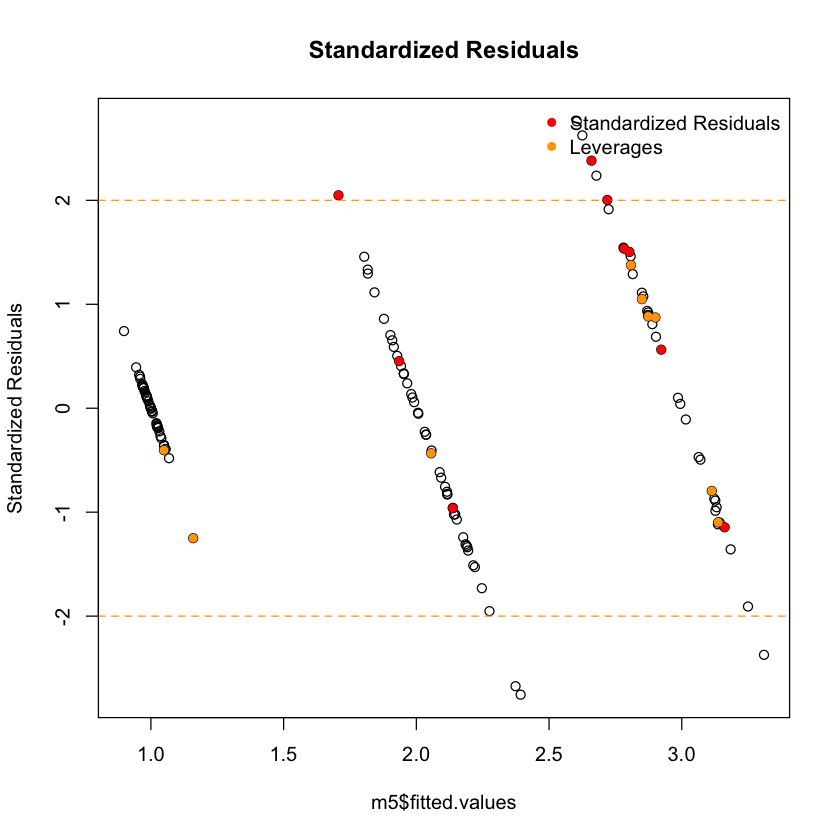

In [30]:
# Plot standardized residuals (needs correction)
res_std <- rstandard(m5) 
plot(m5$fitted.values, res_std, ylab = "Standardized Residuals", main = "Standardized Residuals")
abline(h = c(-2, 2), lty = 2, col = 'orange')
points(m5$fitted.values[watchout_ids_rstd], 
       res_std[watchout_ids_rstd], col = 'red', pch = 16)
points(m5$fitted.values[watchout_ids_lev], 
       res_std[watchout_ids_lev], col = 'orange', pch = 16)
legend('topright', col = c('red', 'orange'), 
       legend = c('Standardized Residuals', 'Leverages'), pch = rep(16, 2), bty = 'n')

In [32]:
# Stepwise covariate selection
m5 = lm(class ~ . + sl*pl + sl*sw + sl*pw + pl*sw + pl*pw + sw*pw, iris.data[id_to_keep, ])
summary(m5)
shapiro.test(residuals(m5))


Call:
lm(formula = class ~ . + sl * pl + sl * sw + sl * pw + pl * sw + 
    pl * pw + sw * pw, data = iris.data[id_to_keep, ])

Residuals:
     Min       1Q   Median       3Q      Max 
-0.39264 -0.09239  0.00044  0.06016  0.39272 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  4.006079   1.047968   3.823 0.000206 ***
sl          -0.673684   0.251475  -2.679 0.008372 ** 
sw          -0.943567   0.313339  -3.011 0.003144 ** 
pl           0.116073   0.341727   0.340 0.734674    
pw           1.310238   0.777780   1.685 0.094544 .  
sl:pl       -0.008993   0.035595  -0.253 0.800949    
sl:sw        0.197016   0.069321   2.842 0.005230 ** 
sl:pw       -0.002555   0.102309  -0.025 0.980117    
sw:pl        0.015924   0.085840   0.186 0.853133    
pl:pw        0.135030   0.033401   4.043 9.14e-05 ***
sw:pw       -0.408853   0.187512  -2.180 0.031085 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1451 on 12


	Shapiro-Wilk normality test

data:  residuals(m5)
W = 0.97936, p-value = 0.03578


In [34]:
step(m5, direction = "both", trace = TRUE)
m7 = lm(formula = class ~ sl + sw + pl + pw + sl:sw + pl:pw + sw:pw, 
        data = iris.data[id_to_keep, ])
summary(m7)
shapiro.test(residuals(m7))

Start:  AIC=-518.3
class ~ sl + sw + pl + pw + sl * pl + sl * sw + sl * pw + pl * 
    sw + pl * pw + sw * pw

        Df Sum of Sq    RSS     AIC
- sl:pw  1   0.00001 2.6542 -520.30
- sw:pl  1   0.00072 2.6549 -520.27
- sl:pl  1   0.00134 2.6556 -520.24
<none>               2.6542 -518.30
- sw:pw  1   0.10015 2.7544 -515.23
- sl:sw  1   0.17015 2.8244 -511.79
- pl:pw  1   0.34428 2.9985 -503.60

Step:  AIC=-520.3
class ~ sl + sw + pl + pw + sl:pl + sl:sw + sw:pl + pl:pw + sw:pw

        Df Sum of Sq    RSS     AIC
- sw:pl  1   0.00072 2.6549 -522.27
- sl:pl  1   0.00465 2.6589 -522.06
<none>               2.6542 -520.30
+ sl:pw  1   0.00001 2.6542 -518.30
- sw:pw  1   0.10183 2.7561 -517.15
- sl:sw  1   0.17852 2.8328 -513.39
- pl:pw  1   0.42912 3.0833 -501.77

Step:  AIC=-522.27
class ~ sl + sw + pl + pw + sl:pl + sl:sw + pl:pw + sw:pw

        Df Sum of Sq    RSS     AIC
- sl:pl  1   0.00409 2.6590 -524.06
<none>               2.6549 -522.27
+ sw:pl  1   0.00072 2.6542 -520.30
+ sl


Call:
lm(formula = class ~ sl + sw + pl + pw + sl:sw + pl:pw + sw:pw, 
    data = iris.data[id_to_keep, ])

Coefficients:
(Intercept)           sl           sw           pl           pw        sl:sw  
     4.2175      -0.7409      -0.9477       0.1206       1.3011       0.2048  
      pl:pw        sw:pw  
     0.1236      -0.3904  



Call:
lm(formula = class ~ sl + sw + pl + pw + sl:sw + pl:pw + sw:pw, 
    data = iris.data[id_to_keep, ])

Residuals:
     Min       1Q   Median       3Q      Max 
-0.39304 -0.09193  0.00073  0.06218  0.39214 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  4.21752    0.92544   4.557 1.19e-05 ***
sl          -0.74086    0.18681  -3.966 0.000121 ***
sw          -0.94772    0.30198  -3.138 0.002106 ** 
pl           0.12061    0.04140   2.913 0.004216 ** 
pw           1.30114    0.22682   5.736 6.53e-08 ***
sl:sw        0.20480    0.05979   3.425 0.000824 ***
pl:pw        0.12355    0.01685   7.333 2.20e-11 ***
sw:pw       -0.39044    0.07170  -5.446 2.51e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1436 on 129 degrees of freedom
Multiple R-squared:  0.9702,	Adjusted R-squared:  0.9686 
F-statistic: 600.3 on 7 and 129 DF,  p-value: < 2.2e-16



	Shapiro-Wilk normality test

data:  residuals(m7)
W = 0.98063, p-value = 0.04859


In [36]:
# After stepwise selection: R2 = 0.9685, p-value = 0.1171

# Manually remove 'pw' (as it has the largest estimate)
m8 = lm(formula = class ~ sl + sw + pl + sl:sw + pl:pw + sw:pw, 
        data = iris.data[id_to_keep, ])
summary(m8)
shapiro.test(residuals(m8))
# Final model: R2 = 0.959, p-value = 0.4222 (indicating normality of residuals).


Call:
lm(formula = class ~ sl + sw + pl + sl:sw + pl:pw + sw:pw, data = iris.data[id_to_keep, 
    ])

Residuals:
     Min       1Q   Median       3Q      Max 
-0.38940 -0.09914 -0.00897  0.09440  0.38759 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.55949    0.89401   1.744 0.083458 .  
sl          -0.08348    0.16465  -0.507 0.612995    
sw          -0.03568    0.28652  -0.125 0.901079    
pl           0.15713    0.04565   3.442 0.000777 ***
sl:sw       -0.01554    0.05114  -0.304 0.761767    
pl:pw        0.13673    0.01863   7.341 2.06e-11 ***
sw:pw       -0.02390    0.03630  -0.658 0.511431    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1602 on 130 degrees of freedom
Multiple R-squared:  0.9626,	Adjusted R-squared:  0.9609 
F-statistic: 557.9 on 6 and 130 DF,  p-value: < 2.2e-16



	Shapiro-Wilk normality test

data:  residuals(m8)
W = 0.98709, p-value = 0.2284


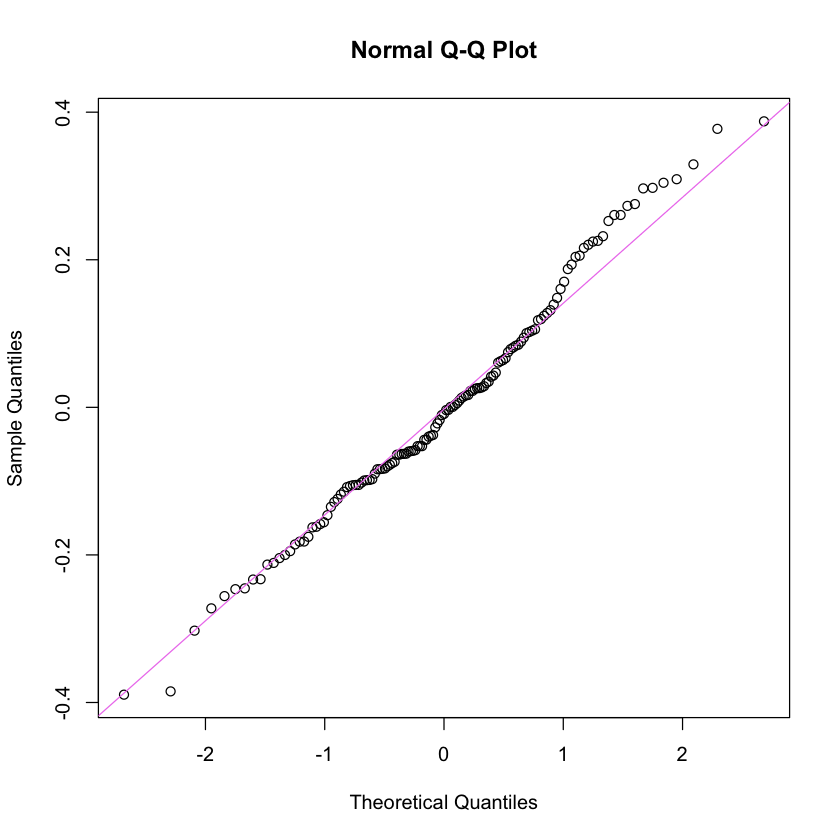

In [38]:
# Q-Q plot for residuals
qqnorm(m8$residuals)
qqline(m8$residuals, col = 'violet')

# The model has reached a very good level (good fit).